### Packages Import

In [1]:
import pandas as pd
import numpy as np
from time import time 

import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

import matplotlib.pyplot as plt

### Upload and Analyze Data

In [2]:
features_name = pd.read_csv('features.txt', header=None)

features_names = features_name[0].apply(lambda x: x.rstrip()).tolist()
features_names[:3]

['tBodyAcc-Mean-1', 'tBodyAcc-Mean-2', 'tBodyAcc-Mean-3']

In [3]:
len(features_names)

561

In [4]:
len(set(features_names))

533

* ### Training 

In [5]:
features_train = pd.read_csv('X_train.txt', sep=' ', header=None)
features_train.columns = features_names

target_train = pd.read_csv('y_train.txt', header=None, names=['Target'])

#### Target

In [6]:
target_train.shape

(7767, 1)

In [7]:
target_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Target,7767.0,3.934595,2.160171,1.0,2.0,4.0,5.0,12.0


In [8]:
target_train.isnull().sum()

Target    0
dtype: int64

In [9]:
target_train.value_counts().to_frame()

,0
Target,
5,1423
6,1413
4,1293
1,1226
2,1073
3,987
11,90
9,75
10,60


#### Features

In [10]:
features_train.head(2)

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.04358,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.03948,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436


In [11]:
features_train.shape

(7767, 561)

In [12]:
features_train.describe().T

,count,mean,std,min,25%,50%,75%,max
tBodyAcc-Mean-1,7767.0,0.038759,0.101996,-1.000000,0.032037,0.038975,0.044000,1.000000
tBodyAcc-Mean-2,7767.0,-0.000647,0.099974,-1.000000,-0.011209,-0.002921,0.004303,1.000000
tBodyAcc-Mean-3,7767.0,-0.018155,0.089927,-1.000000,-0.028448,-0.019602,-0.011676,1.000000
tBodyAcc-STD-1,7767.0,-0.599017,0.441481,-1.000000,-0.992140,-0.914202,-0.246026,1.000000
tBodyAcc-STD-2,7767.0,-0.634424,0.367558,-1.000000,-0.983570,-0.827970,-0.313069,0.945956
...,...,...,...,...,...,...,...,...
tBodyGyro-AngleWRTGravity-1,7767.0,0.009239,0.601208,-1.000000,-0.470267,0.001515,0.496871,0.998702
tBodyGyroJerk-AngleWRTGravity-1,7767.0,-0.005184,0.477218,-1.000000,-0.373565,-0.005503,0.352690,0.991288
tXAxisAcc-AngleWRTGravity-1,7767.0,-0.485936,0.509278,-1.000000,-0.810953,-0.706619,-0.488765,1.000000
tYAxisAcc-AngleWRTGravity-1,7767.0,0.050310,0.300866,-1.000000,-0.047752,0.176777,0.246834,0.482229


In [13]:
features_train.isnull().any().sum()

0

In [14]:
features_train.select_dtypes(exclude=[np.number]).columns

Index([], dtype='object')

* ### Test

In [15]:
features_test = pd.read_csv('X_test.txt', sep=' ', header=None)
features_test.columns = features_names

target_test = pd.read_csv('y_test.txt', header=None, names=['Target'])

In [16]:
features_test.isnull().any().sum()

0

In [17]:
features_test.select_dtypes(exclude=[np.number]).columns

Index([], dtype='object')

### Process Data

In [18]:
scaler = StandardScaler()

In [19]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(features_train), columns = features_train.columns)

In [20]:
X_test_scaled = pd.DataFrame(scaler.fit_transform(features_test), columns = features_test.columns)

### Dimensionality Reduction - PCA

In [21]:
pca = PCA()

In [22]:
pca_fit = pca.fit(X_train_scaled)

In [23]:
# Investigate the variance accounted for by each principal component.

def scree_plot(pca): # Function from PCA lesson
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    RETURN: None
    '''
    
    num_components= len(pca.explained_variance_ratio_)
    idx = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(15, 10))
    ax = plt.subplot(111)
    cum_vals = np.cumsum(vals)
    ax.bar(idx, vals)
    ax.plot(idx, cum_vals)
    
    for i in range(num_components):
        if(i % 20 == 0 or i < 6):
            ax.annotate(r'%s%%' % ((str(vals[i]*100)[:4])), (idx[i]+0.2, vals[i]), va='bottom', ha='center', fontsize=8)
 
    ax.xaxis.set_tick_params(width = 0, gridOn = True)
    ax.yaxis.set_tick_params(width = 2, length = 12, gridOn = True)
 
    ax.set_xlabel('Principal Component')
    ax.set_ylabel('Variance Explained (%)')
    plt.title('Explained Variance Per Principal Component')

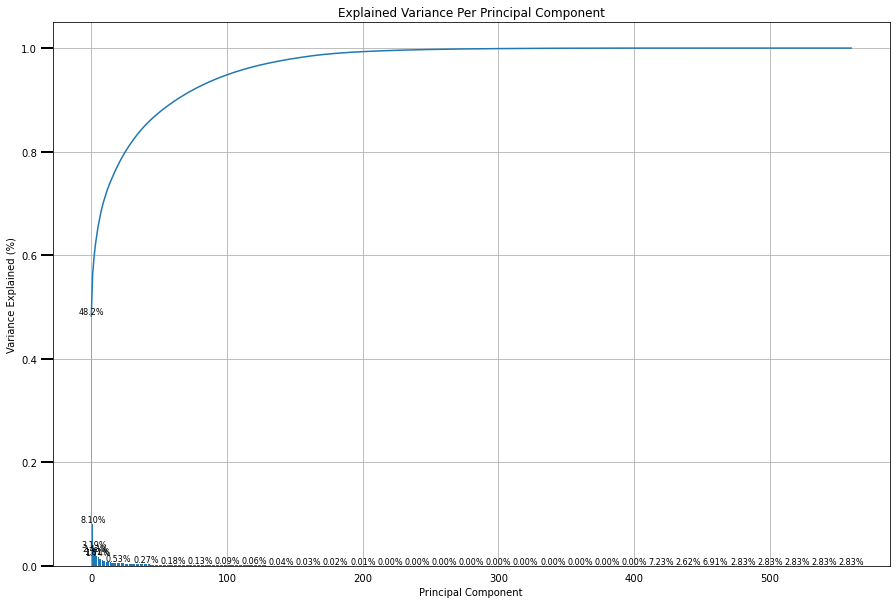

In [24]:
scree_plot(pca_fit)

In [25]:
# Re-apply PCA to the data while selecting for number of components to retain
pca = PCA(n_components = 100)

train_pca = pca.fit_transform(X_train_scaled)

In [26]:
test_pca = pca.transform(X_test_scaled)

In [27]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight

def principal_components(features, pca, component_idx, num_features):
    
    if component_idx <= len(pca.components_):
    
        weight_features_dict = {'Weight' : pca.components_[component_idx], 
                                'Feature': features}
        
        weight_features_df = pd.DataFrame(weight_features_dict)
        weight_features_df.sort_values('Weight', ascending=False, inplace=True)
    
        print('The {} most significant variables for the component {} and their respective weights are:'.format(num_features, component_idx + 1))
        print(weight_features_df.iloc[:num_features, :])
        print('\n')
        print('The {} least significant variables for the component {} and their respective weights are:'.format(num_features, component_idx + 1))
        print(weight_features_df.iloc[-num_features:, :])

In [28]:
principal_components(X_train_scaled.columns, pca, 0, 3)

The 3 most significant variables for the component 1 and their respective weights are:
       Weight             Feature
280  0.060024      fBodyAcc-SMA-1
438  0.059989     fBodyGyro-SMA-1
359  0.059555  fBodyAccJerk-SMA-1


The 3 least significant variables for the component 1 and their respective weights are:
      Weight             Feature
13 -0.055938      tBodyAcc-Min-2
92 -0.056191  tBodyAccJerk-Min-1
12 -0.056359      tBodyAcc-Min-1


### Model Implementation

In [29]:
def train_predict(model, X_train, y_train, X_test, y_test):
    
    '''
    inputs:
       - model: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: target training set
       - X_valid: features testing set
       - y_valid: target testing set
    '''
    
    # Fit the model within the training data, slicing it by 'sample_size'. Obtain training time
    start = time()
    model = model.fit(X_train, y_train)
    end = time()
    
    train_time = end - start
    
    # Predict target on the train and test sets and obtain total prediction time
    start = time()
    predictions_train = model.predict(X_train) # For training, we just predict the first 300 samples
    predictions_test  = model.predict(X_test)
    end = time()
    
    pred_time = end - start
    
    # Calculate accuracy
    acc_train = accuracy_score(y_train, predictions_train)
    acc_test  = accuracy_score(y_test, predictions_test)
    
    # Calculate F-beta Score
    f_train = fbeta_score(y_train, predictions_train, beta=0.5, average='micro')
    f_test  = fbeta_score(y_test,  predictions_test,  beta=0.5, average='micro')
    
    
    print('{}:'.format(model.__class__.__name__))
    print('Accuracy - Train: {:.2f}, Test: {:.2f}'.format(acc_train, acc_test))
    print('F-score  - Train: {:.2f}, Test: {:.2f}'.format(f_train, f_test))
    print('Training time: {:.2f}, Prediction time {:.2f}.\n'.format(train_time, pred_time))

In [30]:
# Initialize models whose performance we are going to test
clf_A = LogisticRegression(random_state = 42)
clf_B = RandomForestClassifier(random_state = 42)
clf_C = AdaBoostClassifier(random_state = 42)
clf_D = XGBClassifier(random_state = 42)

models = [clf_A, clf_B, clf_C, clf_D]

In [31]:
for clf in models:
    train_predict(clf, train_pca, target_train, test_pca, target_test)

/Users/jessicagarre/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jessicagarre/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-29-e8faeac6c40b>:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mod

LogisticRegression:
Accuracy - Train: 0.98, Test: 0.92
F-score  - Train: 0.98, Test: 0.92
Training time: 0.62, Prediction time 0.00.

RandomForestClassifier:
Accuracy - Train: 1.00, Test: 0.88
F-score  - Train: 1.00, Test: 0.88
Training time: 6.63, Prediction time 0.24.



/Users/jessicagarre/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostClassifier:
Accuracy - Train: 0.34, Test: 0.33
F-score  - Train: 0.34, Test: 0.33
Training time: 5.43, Prediction time 0.28.



/Users/jessicagarre/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier:
Accuracy - Train: 1.00, Test: 0.90
F-score  - Train: 1.00, Test: 0.90
Training time: 32.10, Prediction time 0.31.



In [32]:
# Initialize the classifier we chose
model = LogisticRegression(random_state = 42)

# Set the parameters list
parameters = {'C': [0.001, 0.01, 0.1, 1.0]}

# Make F-score scoring object
scorer = make_scorer(fbeta_score, beta=0.5, average='micro')

In [33]:
grid = GridSearchCV(model,
                    parameters,
                    scorer)

/Users/jessicagarre/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass scoring=make_scorer(fbeta_score, beta=0.5, average=micro) as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [35]:
grid_fit = grid.fit(train_pca, target_train)

/Users/jessicagarre/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jessicagarre/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jessicagarre/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

/Users/jessicagarre/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jessicagarre/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jessicagarre/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED 

In [36]:
# Obtain best estimator
best_clf = grid_fit.best_estimator_
best_clf

LogisticRegression(C=0.1, random_state=42)

In [38]:
best_pred  = best_clf.predict(test_pca)
best_pred_train  = best_clf.predict(train_pca)

In [40]:
print('Final accuracy - Train: {:.3f}, Test: {:.3f}'.format(accuracy_score(target_train, best_pred_train), accuracy_score(target_test, best_pred)))
print('Final F-score  - Train: {:.3f}, Test: {:.3f}'.format(fbeta_score(target_train, best_pred_train, beta = 0.5, average='micro'), fbeta_score(target_test, best_pred, beta = 0.5, average='micro')))

Final accuracy - Train: 0.978, Test: 0.925
Final F-score  - Train: 0.978, Test: 0.925
